In [53]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

#Loading Data
train_data = pd.read_csv('../DATA/Train.csv')

In [54]:
train_data.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [55]:
# DataFrame Values
print("Number of Rows : ",train_data.shape[0])
print("Number of Columns : ",train_data.shape[1])
print("Column Names : ",train_data.columns.values)

Number of Rows :  1490
Number of Columns :  3
Column Names :  ['ArticleId' 'Text' 'Category']


In [56]:
# Data Points per Category
train_data['Category'].value_counts()

sport            346
business         336
politics         274
entertainment    273
tech             261
Name: Category, dtype: int64

In [57]:
# Removing rows with missing values
train_data.dropna(inplace=True)
train_data.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [58]:
target_category = train_data['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


<AxesSubplot:xlabel='News Categories', ylabel='Data Points Per Category'>

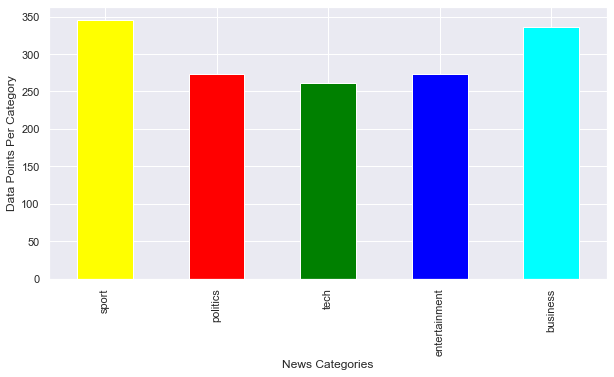

In [59]:
# Plotting data points per category
news_cat = train_data['Category'].value_counts()
my_colors = ['yellow', 'red', 'green', 'blue', 'cyan', 'magenta']
news_cat.sample(frac=1).plot(kind='bar', figsize=(10,5), xlabel="News Categories", ylabel="Data Points Per Category", color=my_colors)

In [60]:
import nltk
from nltk.corpus import stopwords

print(len(stopwords.words('english')))
# print(stopwords.words('english'))

179


In [61]:
import warnings
import re

stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        total_text = re.sub('\s+',' ', total_text)
        total_text = total_text.lower()
        
        for word in total_text.split():
            if not word in stop_words and len(word) >= 3:
                string += word + " "
        df[column][index] = string

In [62]:
# Preprocessing the data

for index, row in train_data.iterrows():
    if type(row['Text']) is str:
        txt_preprocessing(row['Text'], index, 'Text', train_data)

train_data.head()

C:\Users\pravin\AppData\Local\Temp\ipykernel_12648\2339773291.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column][index] = string


,ArticleId,Text,Category
0,1833,worldcom boss launches defence lawyers defendi...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens maj...,business
3,1976,lifestyle governs mobile choice faster better ...,tech
4,917,enron bosses 168m payout eighteen former enron...,business


<Figure size 1080x504 with 0 Axes>

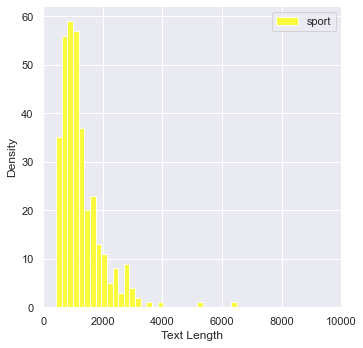

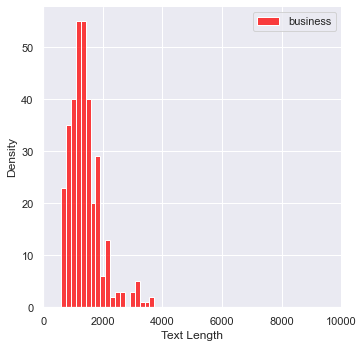

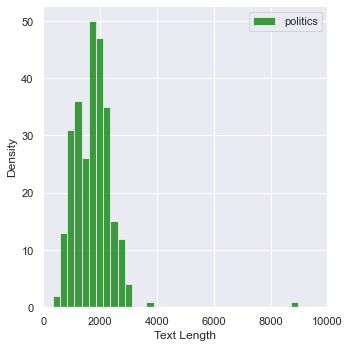

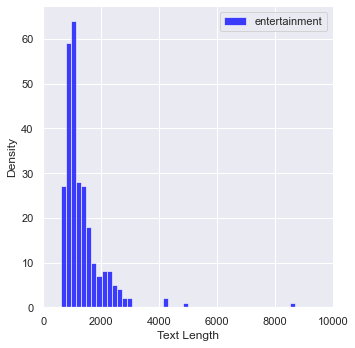

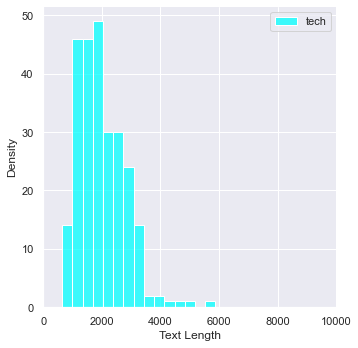

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['yellow', 'red', 'green', 'blue', 'cyan']
labels = train_data['Category'].value_counts().index

for label, color in zip(labels, cmap):
    sns.displot(train_data[train_data['Category'] == label]['Text'].str.len(), color=color, label=label)
    plt.legend()
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.xlim(0, 10000)


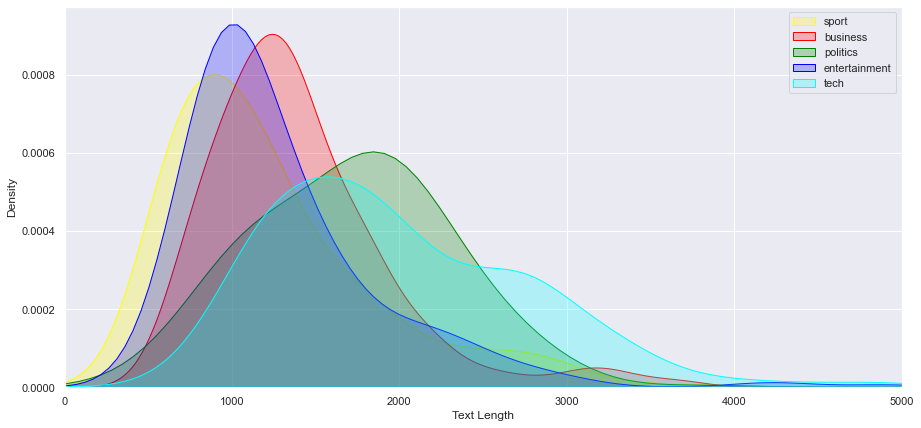

In [68]:
sns.set(color_codes=True)
plt.figure(figsize=(15,7))
cmap = ['yellow', 'red', 'green', 'blue', 'cyan']
labels = train_data['Category'].value_counts().index

for label,color in zip(labels, cmap):
    sns.kdeplot(train_data[train_data['Category'] == label]['Text'].str.len(), color=color, fill=True, label=label)
    plt.legend()
    plt.xlabel('Text Length')
    plt.ylabel('Density')
    plt.xlim(0, 5000)

In [ ]:
import itertools
import collections

lemmatized_tokens = list(train_data['Text'])
tokens_list = list(itertools.chain(*lemmatized_tokens))
# print(len(tokens_list))
for word in tokens_list:
    if len(word) < 3:
        tokens_list.remove(word)
counts = collections.Counter(tokens_list)
clean_articles = pd.DataFrame(counts.most_common(20), columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))

clean_articles.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple")
ax.set_title("Common Words Found in News Articles")
plt.show()